In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import PolynomialFeatures

In [26]:
#funcion que obtiene filas con nulls
def filasConNulls(dataset):
    is_NaN = dataset.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    rows_with_NaN = dataset[row_has_NaN]
    return rows_with_NaN

In [27]:
#funcion que elimina las filas con nulls
def eliminarNulls(dataset,filas):
    dataset.drop(filas, inplace=True)
    return dataset

In [28]:
#Funcion que devuelve una lista con valores True en las posiciones que corresponde a columnas nulas
def determinar_valores_perdidos(dataset, nombreColumnas):
    resultados_por_columnas = []
    for nombre in nombreColumnas:
        res = dataset[nombre].isnull().values.any()
        resultados_por_columnas.append(res)
    return resultados_por_columnas

In [29]:
#funcion sustituye nulls por media en columnas
def sustituirMedia(dataset):
    nombres_variables_numericas=dataset.select_dtypes(exclude='object').columns
    nombres_variables_categoricas=dataset.select_dtypes(include='object').columns
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    transformacion=[('transformacionnumerica', imp_mean, nombres_variables_numericas)]
    preprocesamiento=ColumnTransformer(transformers=transformacion)
    dataset_sin_missing = dataset.copy()
    dataset_sin_missing=preprocesamiento.fit_transform(dataset)
    dataset_sin_missing=pd.DataFrame(data=dataset_sin_missing,index=dataset.index,columns=np.array(nombres_variables_numericas))
    return dataset_sin_missing

In [30]:
#leo dataset y encuentro filas con null
dataset = pd.read_csv('all_stocks_5yr.csv', na_values= '?')
indicesNulls=filasConNulls(dataset)
nombreColumnas = ['date', 'open', 'high', 'low', 'close','volume','Name']

In [31]:
#creo dataset sin nulls
dataset_sin_nulls=dataset.copy()
dataset_sin_nulls=eliminarNulls(dataset_sin_nulls, indicesNulls.index)
print(dataset_sin_nulls.shape)
print(dataset.shape)

(619029, 7)
(619040, 7)


In [32]:
#obtengo columnas con valores perdidos
res = determinar_valores_perdidos(dataset, nombreColumnas)
print(res)

[False, True, True, True, False, False, False]


In [38]:
#creo dataset sustituyendo por la media
aux_media=sustituirMedia(dataset[nombreColumnas[1:4]])
dataset_media=dataset.copy()
dataset_media[nombreColumnas[1:4]]=aux_media[nombreColumnas[1:4]]

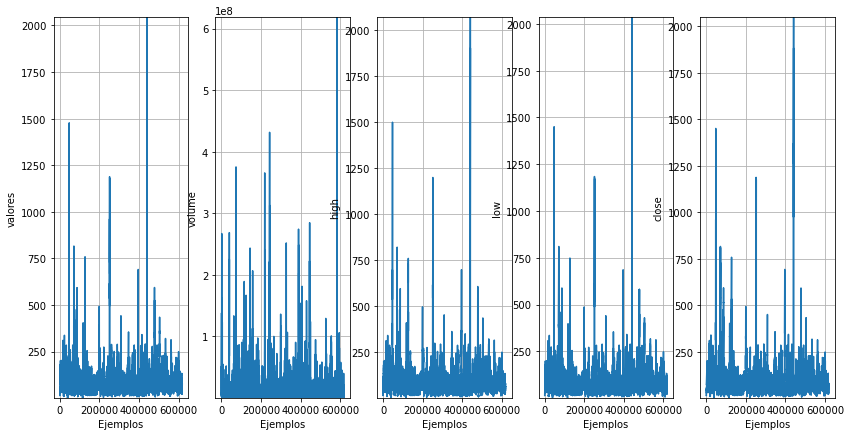

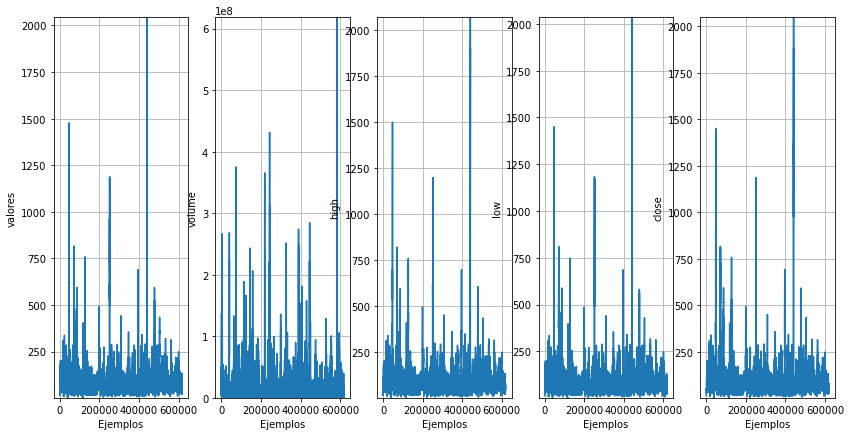

In [42]:
#hablarlo con el grupo
#categoricas por numericas
#codificacion ordinal no tiene sentido al tratar con nombre y fecha ya que en nombre no hay orden y en fecha puede tener sentido
#codificacion conteo no tiene mucho sentido
#bhot encode demasiado disperso
#binaria demasiadas variables
#codificacion basada en salida para los nombres
#creo que la mejor opcion es crear 
for datos in(dataset_sin_nulls,dataset_media):
    resumenEntrada=datos.describe()
    plt.figure(figsize=(14,7))
    plt.subplot(151)
    plt.plot(datos['open'],label='open')
    plt.xlabel('Ejemplos')
    plt.ylabel('valores')
    plt.ylim(resumenEntrada.loc[['min','max'],'open'])
    plt.grid(True)#cuadriculado

    plt.subplot(152)
    plt.plot(datos['volume'])
    plt.xlabel('Ejemplos')
    plt.ylabel('volume')
    plt.ylim(resumenEntrada.loc[['min','max'],'volume'])
    plt.grid(True)

    plt.subplot(153)
    plt.plot(datos['high'])
    plt.xlabel('Ejemplos')
    plt.ylabel('high')
    plt.ylim(resumenEntrada.loc[['min','max'],'high'])
    plt.grid(True)

    plt.subplot(154)
    plt.plot(datos['low'])
    plt.xlabel('Ejemplos')
    plt.ylabel('low')
    plt.ylim(resumenEntrada.loc[['min','max'],'low'])
    plt.grid(True)

    plt.subplot(155)
    plt.plot(datos['close'])
    plt.xlabel('Ejemplos')
    plt.ylabel('close')
    plt.ylim(resumenEntrada.loc[['min','max'],'close'])
    plt.grid(True)














In [43]:
#obtengo el nombre de todas las empresas
resumenEntrada=dataset.describe()
nombres=dataset['Name']
empresas = []
for item in nombres:
    if item not in empresas:
        empresas.append(item)
len(empresas)

505

In [ ]:
#obtengo la empresa de un valor mayor en un día concreto
dataset[dataset['high'] == max(dataset['high'])]

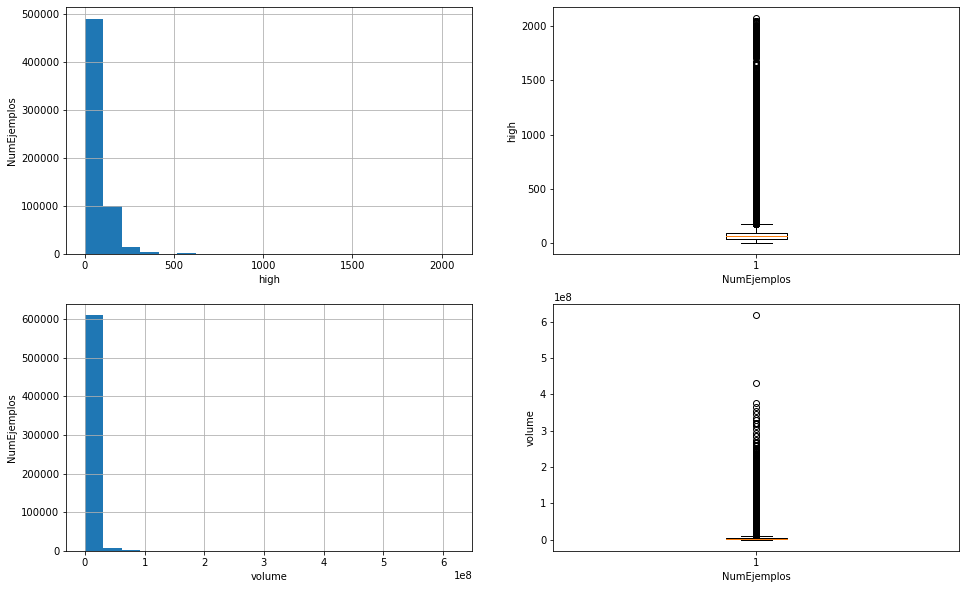

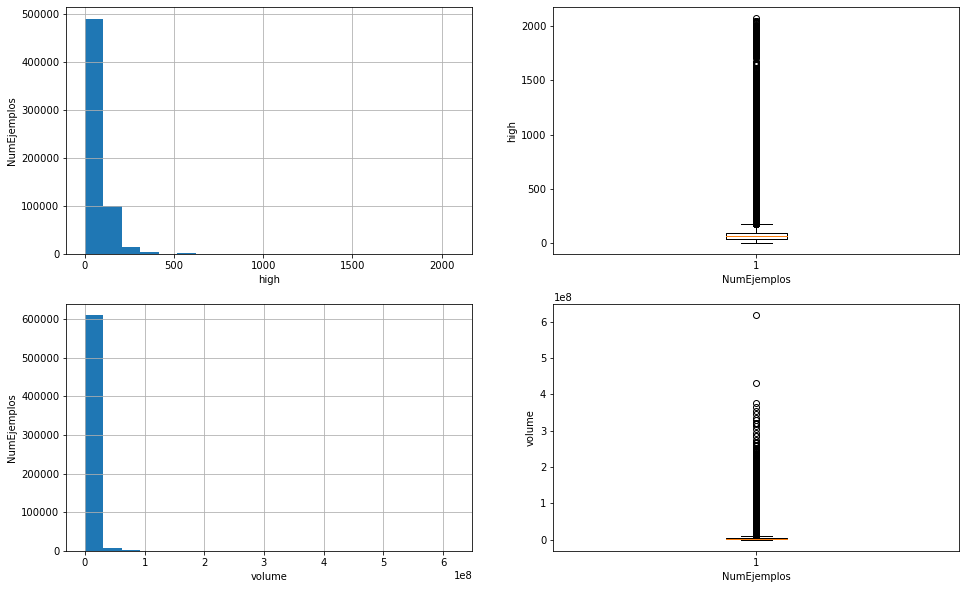

In [45]:
#veo los rangos de algunas variables
for datos in(dataset_sin_nulls,dataset_media):
    plt.figure(figsize=(16,10))
    plt.subplot(2,2,(1))
    datos['high'].hist(bins=20)
    plt.xlabel('high')
    plt.ylabel('NumEjemplos')
    plt.subplot(2,2,(2))
    plt.boxplot(datos['high'])
    plt.ylabel('high')
    plt.xlabel('NumEjemplos')
    plt.subplot(2,2,(3))
    datos['volume'].hist(bins=20)
    plt.xlabel('volume')
    plt.ylabel('NumEjemplos')
    plt.subplot(2,2,(4))
    plt.boxplot(datos['volume'])
    plt.ylabel('volume')
    plt.xlabel('NumEjemplos')

In [48]:
#vemos descripcion de los datos
resumenNullsOut=dataset_sin_nulls.describe()
resumenMedia=dataset_media.describe()
print(resumenNullsOut)
print(resumenMedia)


                open           high            low          close  \
count  619029.000000  619029.000000  619029.000000  619029.000000   
mean       83.023334      83.778419      82.256200      83.043305   
std        97.378769      98.207735      96.507634      97.388913   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.240800   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.370000      95.180000      93.540000      94.410000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  6.190290e+05  
mean   4.321892e+06  
std    8.693671e+06  
min    1.010000e+02  
25%    1.070351e+06  
50%    2.082165e+06  
75%    4.284550e+06  
max    6.182376e+08  
                open           high            low          close  \
count  619040.000000  619040.000000  619040.000000  619040.000000   
mean       83.023334      83.778311      8

In [ ]:
#parece ser que todos los datos se encuentran en la misma escala


In [50]:
#detectar outliers
def deteccionOutliers_IQR(Dataframe,k=1.5):
    IQR=Dataframe.describe().loc['75%',:]-Dataframe.describe().loc['25%',:]
    superiores=Dataframe>Dataframe.describe().loc['75%',:]+k*IQR
    inferiores=Dataframe<Dataframe.describe().loc['25%',:]-k*IQR
    resultado=np.logical_or(superiores,inferiores)
    return resultado.any(axis=1)

In [52]:
def deteccionOutliers_MeanStd(Dataframe,k=2):
    superiores=Dataframe>Dataframe.describe().loc['mean',:]+k*Dataframe.describe().loc['std',:]
    inferiores=Dataframe<Dataframe.describe().loc['mean',:]-k*Dataframe.describe().loc['std',:]
    resultado=np.logical_or(superiores,inferiores)
    return resultado.any(axis=1)

In [62]:
#obtengo datasets sin outliers según método de IQR y método de la desviación
dataset_sin_outDesviacion=dataset_sin_nulls.copy()
outliers_ms=deteccionOutliers_MeanStd(dataset_sin_outDesviacion)
dataset_sin_outDesviacion=dataset_sin_outDesviacion[(np.logical_not(deteccionOutliers_MeanStd(dataset_sin_outDesviacion,3)))]

dataset_sin_outIQR=dataset_sin_nulls.copy()
outliers_IQR=deteccionOutliers_IQR(dataset_sin_outIQR)
dataset_sin_outIQR=dataset_sin_outIQR[(np.logical_not(deteccionOutliers_IQR(dataset_sin_outIQR,3)))]


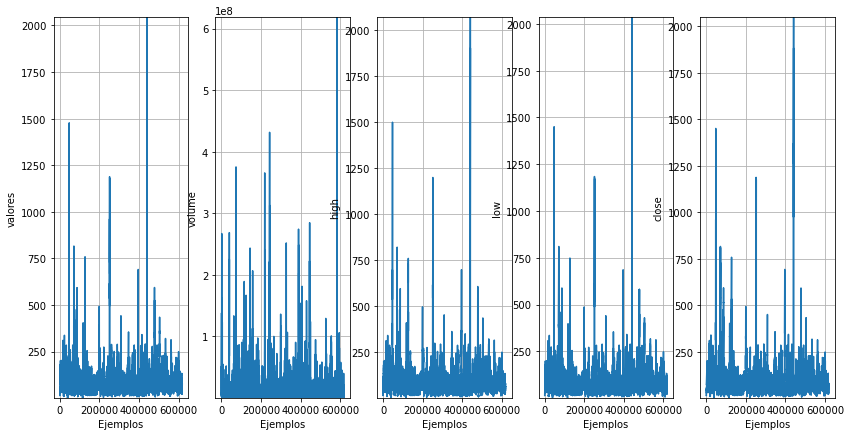

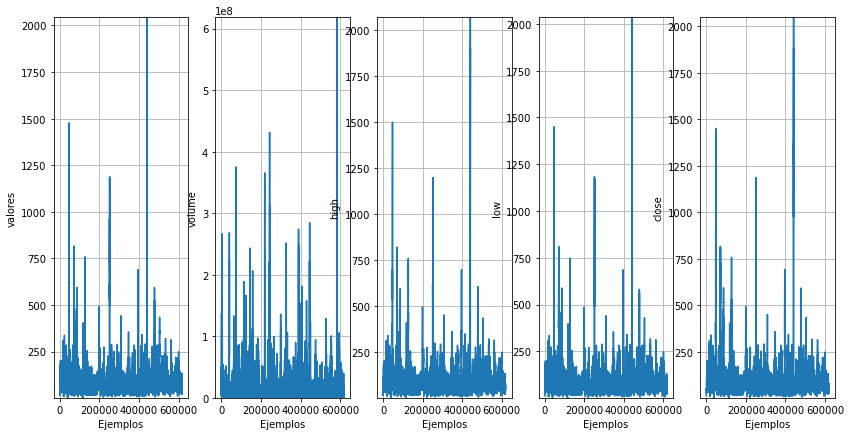

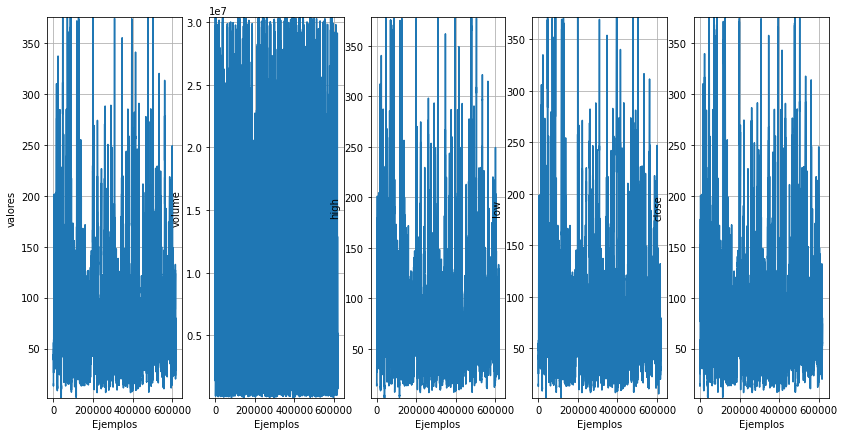

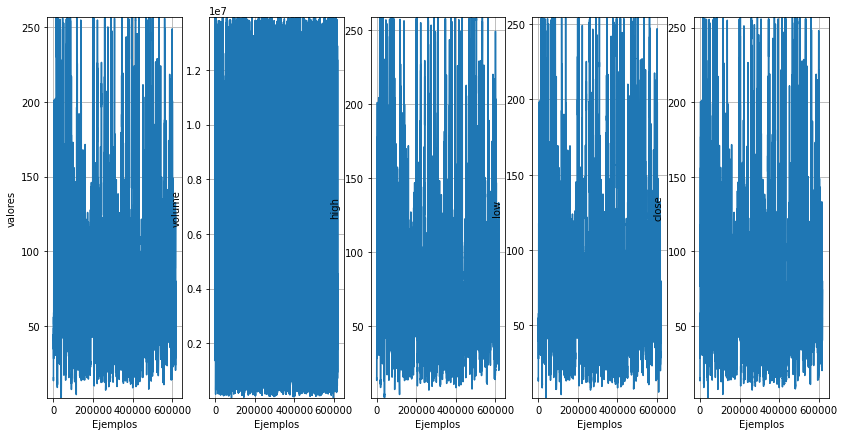

In [72]:
for datos in(dataset_sin_nulls,dataset_media,dataset_sin_outDesviacion,dataset_sin_outIQR):
    resumenEntrada=datos.describe()
    plt.figure(figsize=(14,7))
    plt.subplot(151)
    plt.plot(datos['open'],label='open')
    plt.xlabel('Ejemplos')
    plt.ylabel('valores')
    plt.ylim(resumenEntrada.loc[['min','max'],'open'])
    plt.grid(True)#cuadriculado

    plt.subplot(152)
    plt.plot(datos['volume'])
    plt.xlabel('Ejemplos')
    plt.ylabel('volume')
    plt.ylim(resumenEntrada.loc[['min','max'],'volume'])
    plt.grid(True)

    plt.subplot(153)
    plt.plot(datos['high'])
    plt.xlabel('Ejemplos')
    plt.ylabel('high')
    plt.ylim(resumenEntrada.loc[['min','max'],'high'])
    plt.grid(True)

    plt.subplot(154)
    plt.plot(datos['low'])
    plt.xlabel('Ejemplos')
    plt.ylabel('low')
    plt.ylim(resumenEntrada.loc[['min','max'],'low'])
    plt.grid(True)

    plt.subplot(155)
    plt.plot(datos['close'])
    plt.xlabel('Ejemplos')
    plt.ylabel('close')
    plt.ylim(resumenEntrada.loc[['min','max'],'close'])
    plt.grid(True)
    
    
    

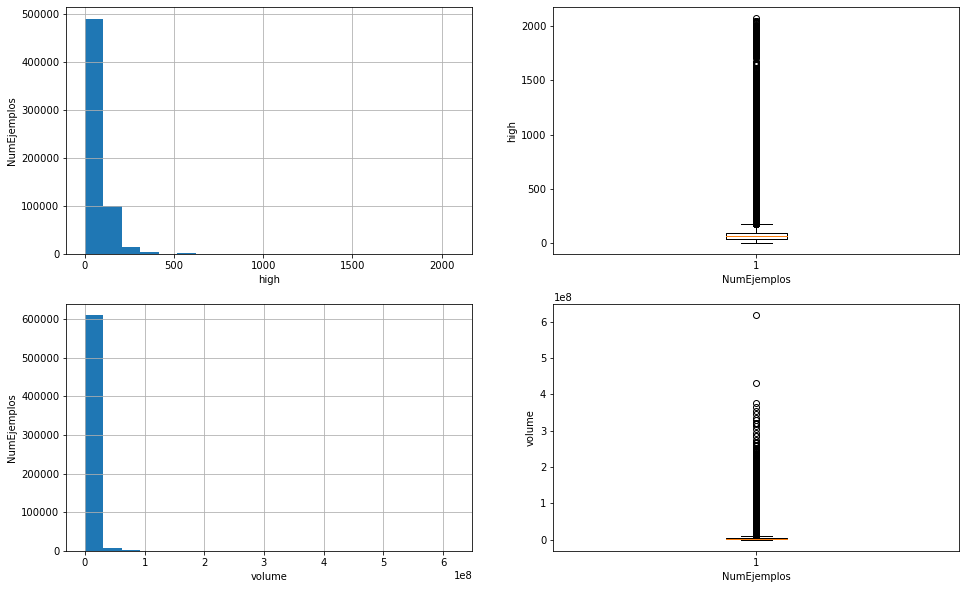

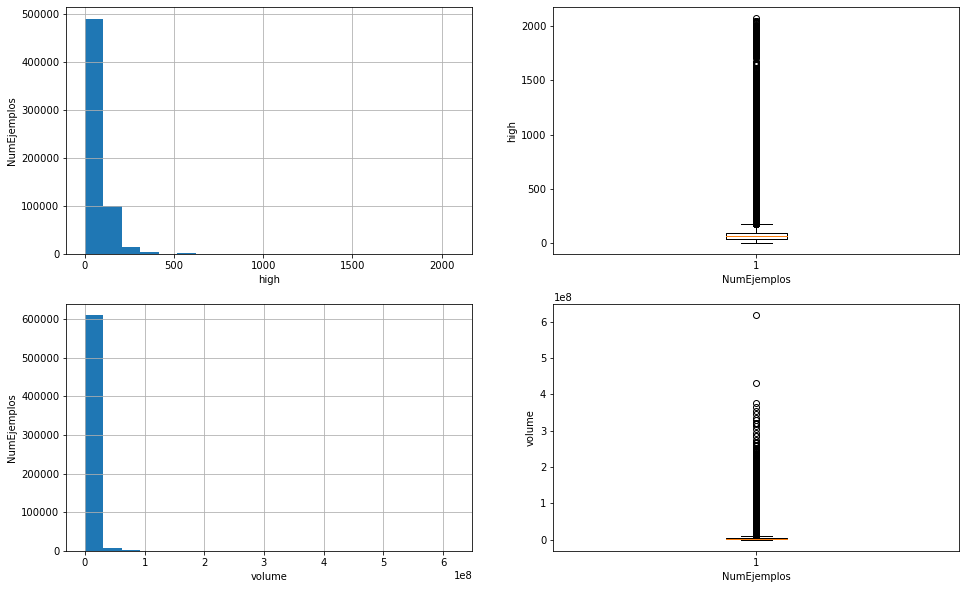

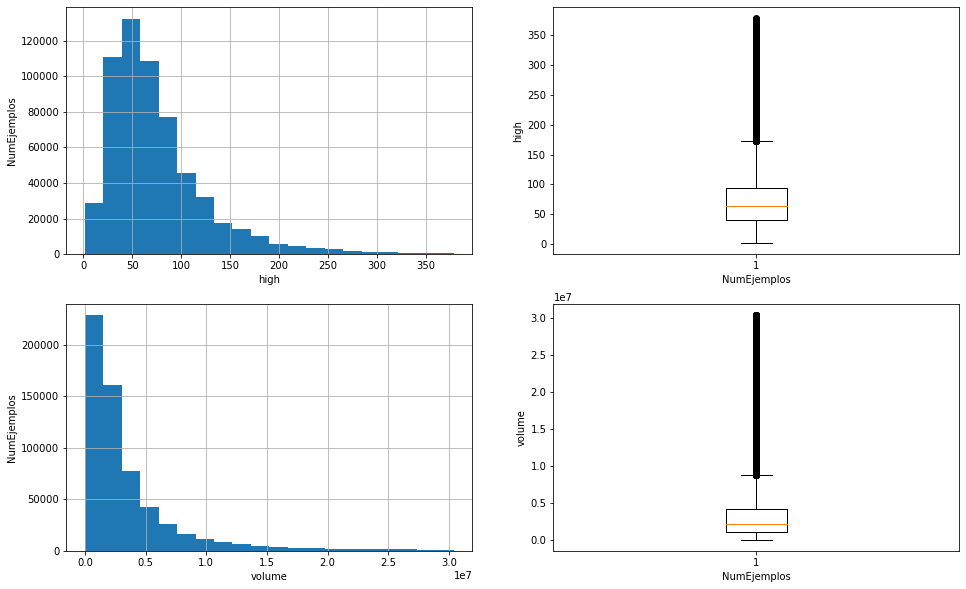

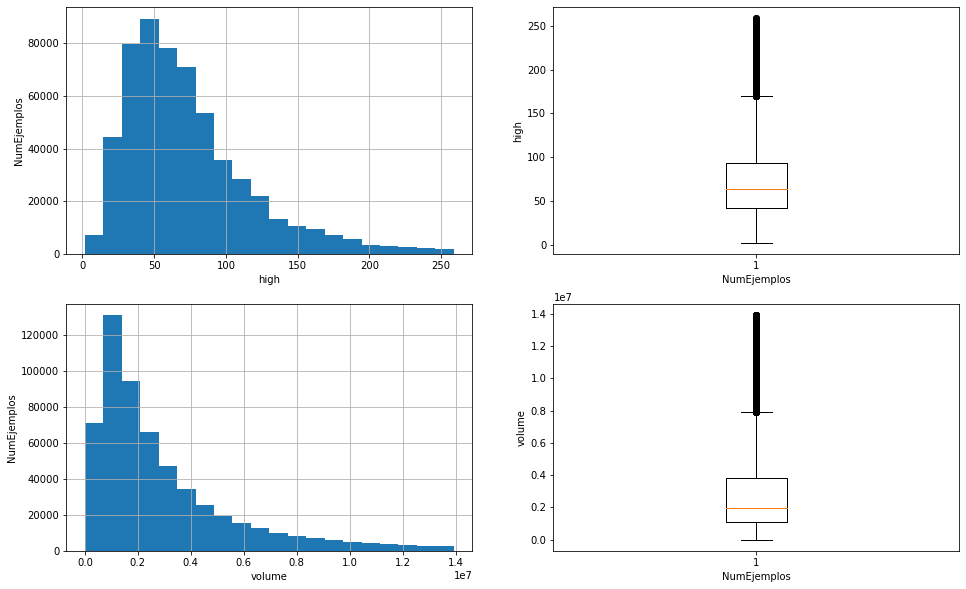

In [73]:
for datos in(dataset_sin_nulls,dataset_media,dataset_sin_outDesviacion,dataset_sin_outIQR):
    plt.figure(figsize=(16,10))
    plt.subplot(2,2,(1))
    datos['high'].hist(bins=20)
    plt.xlabel('high')
    plt.ylabel('NumEjemplos')
    plt.subplot(2,2,(2))
    plt.boxplot(datos['high'])
    plt.ylabel('high')
    plt.xlabel('NumEjemplos')
    plt.subplot(2,2,(3))
    datos['volume'].hist(bins=20)
    plt.xlabel('volume')
    plt.ylabel('NumEjemplos')
    plt.subplot(2,2,(4))
    plt.boxplot(datos['volume'])
    plt.ylabel('volume')
    plt.xlabel('NumEjemplos')

In [74]:
##HAY QUE ESTANDARIZAR y knn,hold-out,validacion cruzada leave one out polynomial regression

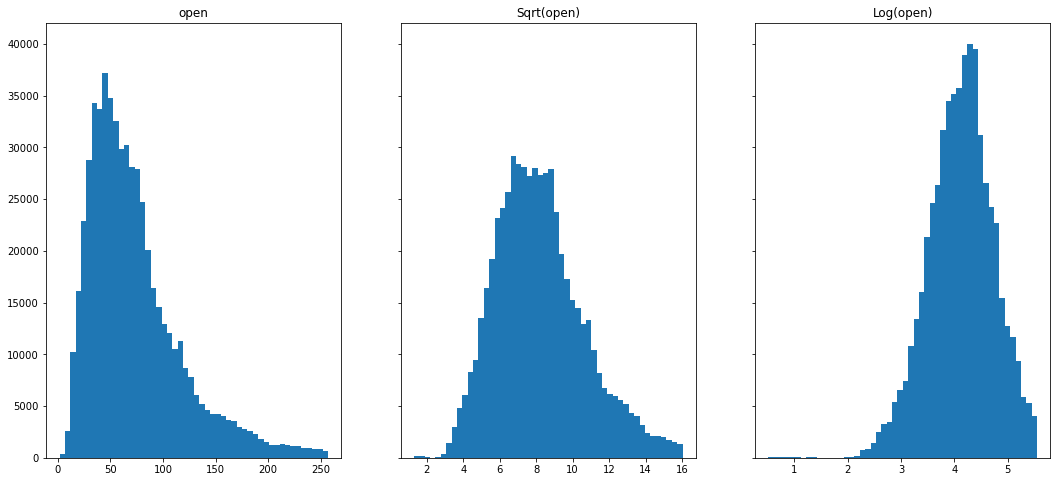

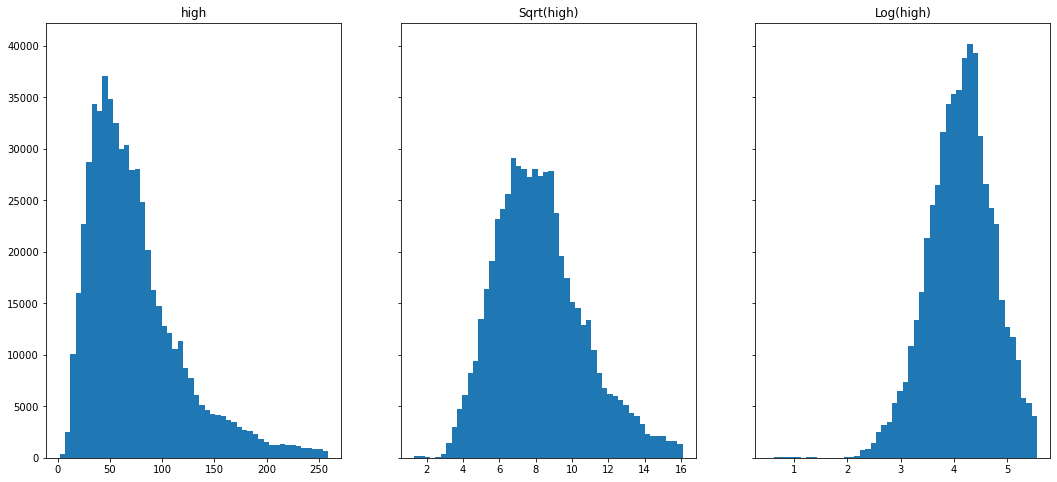

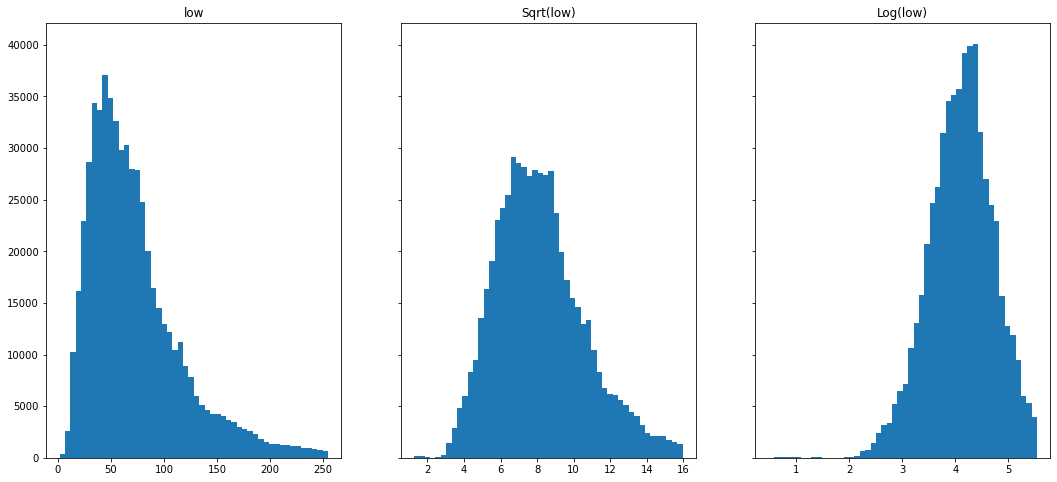

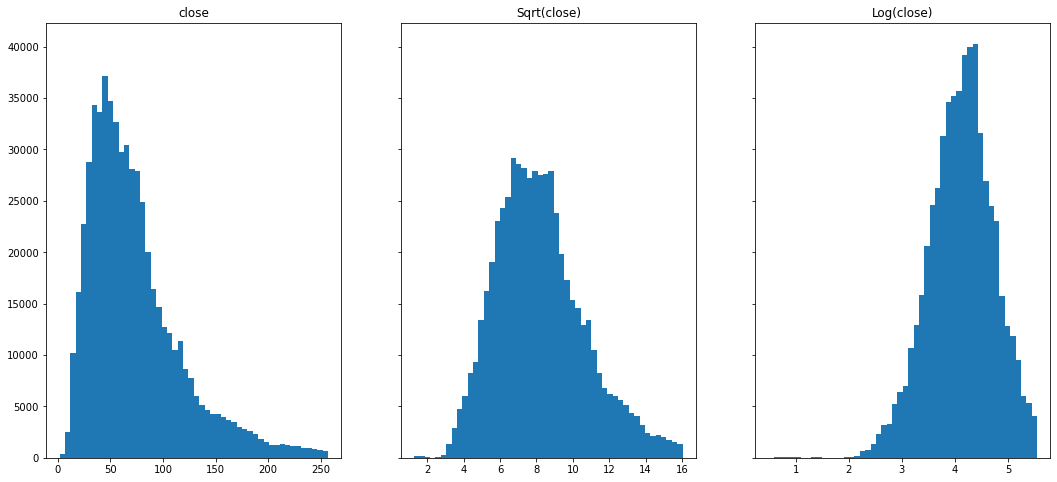

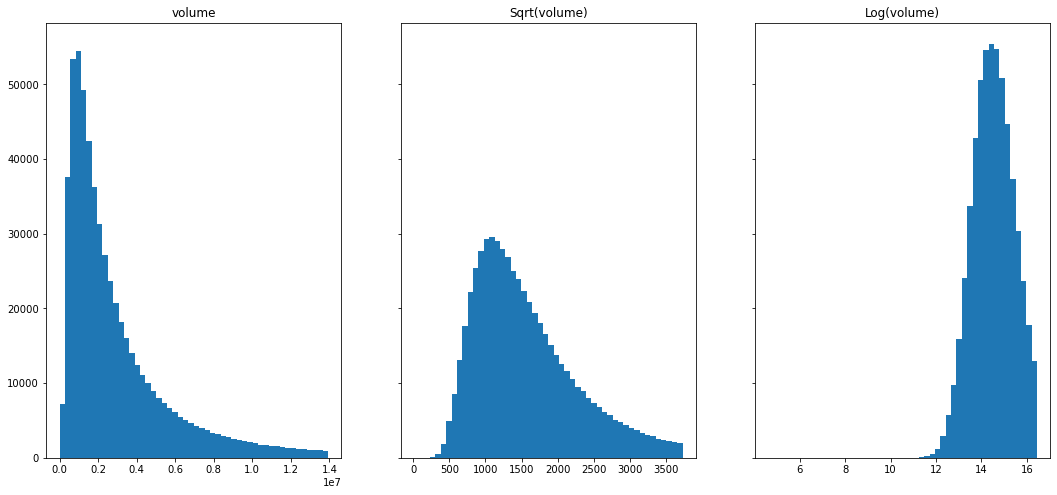

In [114]:
for valor in(nombreColumnas[1:6]):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18,8))
    ax1.hist(dataset_sin_outIQR[valor], bins=50)
    ax1.set_title(valor)
    ax2.hist(np.sqrt(dataset_sin_outIQR[valor]), bins=50)
    ax2.set_title('Sqrt({})'.format(valor))
    ax3.hist(np.log(dataset_sin_outIQR[valor]), bins=50)
    ax3.set_title('Log({})'.format(valor));
    ##transformar a logaritmica o a raiz
    #mirar obtener en fecha la tendencia

In [154]:
#genero nuevas variables
dataset_sin_outIQR['diferencia_maxmin'] = dataset_sin_outIQR.high - dataset_sin_outIQR.low
dataset_sin_outIQR.date = pd.to_datetime(dataset_sin_outIQR.date)
dataset_sin_outIQR['Dia'] = dataset_sin_outIQR.date.dt.day
dataset_sin_outIQR['Mes'] = dataset_sin_outIQR.date.dt.month
dataset_sin_outIQR['Año'] = dataset_sin_outIQR.date.dt.year
dataset_sin_outIQR['nombreDia'] = dataset_sin_outIQR.date.dt.day_name()
dataset_sin_outIQR['finde']=dataset_sin_outIQR['Dia'].apply(modificarFinde)
dataset_sin_outIQR['estacion']=dataset_sin_outIQR['Mes'].apply(modificarEstacion)


#no hay findes

In [140]:
def modificarFinde(dia):
    if dia in('Saturday','Sunday'):
        return 1
    else:
        return 0


In [148]:
def modificarEstacion(mes):
    if 9<=mes<=11:
        return 'Otoño'
    elif 3<=mes<=5:
        return 'Primavera'
    elif 6<=mes<=8:
        return 'Verano'
    else:
        return 'Invierno'

In [159]:
#ordenar nombres por media acciones
mas_acciones=dataset_sin_outIQR.groupby(['Name']).volume.mean().sort_values(ascending=False)
mas_acciones=mas_acciones.iloc[0:25]
mas_acciones

Name
GE       1.337429e+07
AAPL     1.270635e+07
T        1.208659e+07
MU       1.196334e+07
PFE      1.191620e+07
FB       1.189712e+07
C        1.188297e+07
CMCSA    1.183778e+07
CSCO     1.176420e+07
WFC      1.176254e+07
MSFT     1.154144e+07
JPM      1.135220e+07
INTC     1.134353e+07
F        1.114254e+07
RF       1.083402e+07
VZ       1.075523e+07
ORCL     1.070335e+07
KO       1.058639e+07
GM       1.037272e+07
XOM      1.026113e+07
FCX      1.006916e+07
AMAT     9.971850e+06
AMD      9.710987e+06
HPQ      9.434346e+06
KEY      9.405207e+06
Name: volume, dtype: float64

In [161]:
mas_alto=dataset_sin_outIQR.groupby(['Name']).high.mean().sort_values(ascending=False)
mas_alto=mas_alto.iloc[0:25]
mas_alto

Name
AMZN    255.333333
BLK     248.501766
MTD     235.068666
GWW     227.438011
BIIB    224.725326
ADS     220.320819
REGN    212.151631
ESS     204.503909
EQIX    203.729442
SHW     202.754100
TDG     198.352430
AGN     197.971255
PSA     197.139317
GS      187.282163
LMT     182.117689
RE      181.228709
AMG     180.924987
ORLY    179.407878
SPG     177.978270
ISRG    175.721648
MHK     174.775405
MCK     171.357455
IBM     168.433893
ROP     168.145603
COO     166.772395
Name: high, dtype: float64